1. Veri Setini Yükleme ve İlk İnceleme

In [1]:
import pandas as pd

file_path = 'C:/Users/zeyne/Downloads/train.csv'
loan_data = pd.read_csv(file_path)

print(loan_data.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [34]:
loan_data.shape

(614, 13)

2. Veri Keşfi ve Görselleştirme

In [2]:
print(loan_data.info())

print(loan_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         6

3. Eksik Verilerin Kontrolü

In [3]:
print(loan_data.isnull().sum())

missing_values_percent = loan_data.isnull().sum() / len(loan_data) * 100
print(missing_values_percent)                         

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64


4. Eksik Verilerin Doldurulması

In [4]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

print(loan_data.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


5. Veriyi Görselleştirme

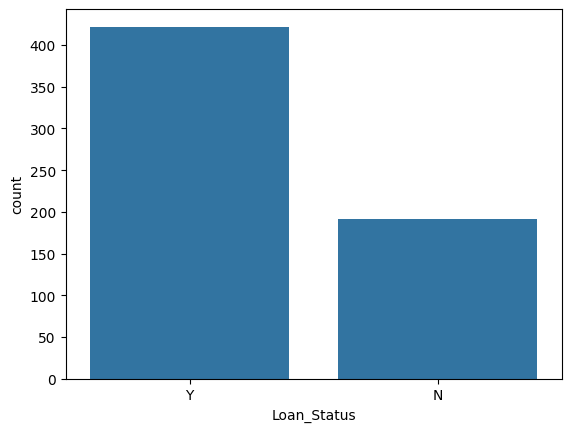

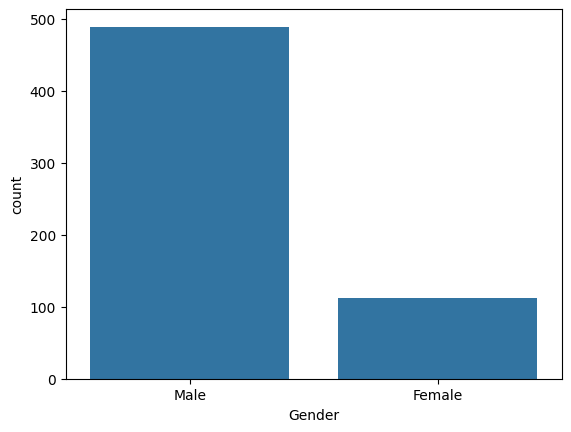

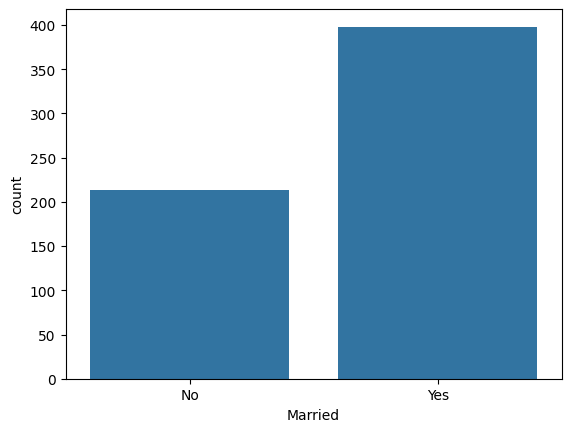

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Loan_Status', data=loan_data)
plt.show()

sns.countplot(x='Gender', data=loan_data)
plt.show()
sns.countplot(x='Married', data=loan_data)
plt.show()

In [18]:
import pandas as pd

file_path = 'C:/Users/zeyne/Downloads/train.csv'
loan_data = pd.read_csv(file_path)

cross_tab = pd.crosstab(loan_data['Gender'], loan_data['Loan_Status'], margins=True)
print(cross_tab)

male_approval_rate = cross_tab.loc['Male', 'Y'] / cross_tab.loc['Male', 'All']
print(f"Erkeklerin kredi onay oranı: {male_approval_rate:.2%}")

female_approval_rate = cross_tab.loc['Female', 'Y'] / cross_tab.loc['Female', 'All']
print(f"Kadınların kredi onay oranı: {female_approval_rate:.2%}")

Loan_Status    N    Y  All
Gender                    
Female        37   75  112
Male         150  339  489
All          187  414  601
Erkeklerin kredi onay oranı: 69.33%
Kadınların kredi onay oranı: 66.96%


In [13]:
loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

6. Model Seçimi ve Eğitimi

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

file_path = 'C:/Users/zeyne/Downloads/train.csv'
loan_data = pd.read_csv(file_path)

loan_data['Gender'] = loan_data['Gender'].fillna(loan_data['Gender'].mode()[0])
loan_data['Married'] = loan_data['Married'].fillna(loan_data['Married'].mode()[0])
loan_data['Dependents'] = loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0])
loan_data['Self_Employed'] = loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0])
loan_data['LoanAmount'] = loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median())
loan_data['Loan_Amount_Term'] = loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0])
loan_data['Credit_History'] = loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0])

le = LabelEncoder()
for column in ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    loan_data[column] = le.fit_transform(loan_data[column])

loan_data['Dependents'] = loan_data['Dependents'].replace('3+', 3)
loan_data['Dependents'] = loan_data['Dependents'].astype(int)

X = loan_data.drop(columns=['Loan_Status', 'Loan_ID'])
y = loan_data['Loan_Status']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(max_iter=2000),
    'Support Vector Classifier': SVC(),
    'Random Forest Classifier': RandomForestClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.7886
Precision: 0.7596
Recall: 0.9875
F1 Score: 0.8587


Model: Support Vector Classifier
Accuracy: 0.7886
Precision: 0.7596
Recall: 0.9875
F1 Score: 0.8587


Model: Random Forest Classifier
Accuracy: 0.7805
Precision: 0.7573
Recall: 0.9750
F1 Score: 0.8525




7. Temel İstatistiksel Analizler

In [7]:
print(loan_data.describe(include='all'))

         Loan_ID Gender Married Dependents Education Self_Employed  \
count        614    614     614        614       614           614   
unique       614      2       2          4         2             2   
top     LP001002   Male     Yes          0  Graduate            No   
freq           1    502     401        360       480           532   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        614.000000         614.000000  614.000000        614.000000   
unique 

8. Kategorik Değişkenlerin Dağılımı

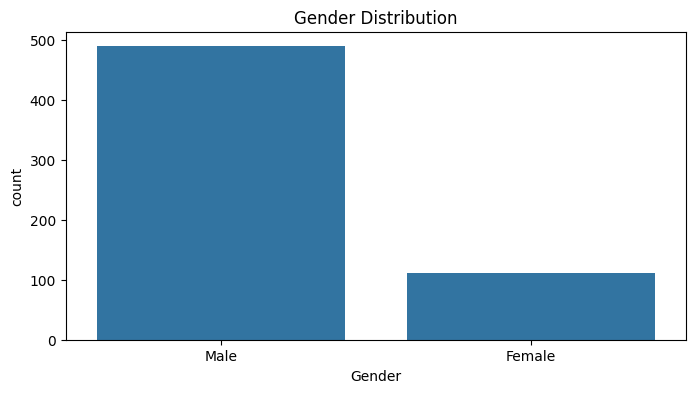

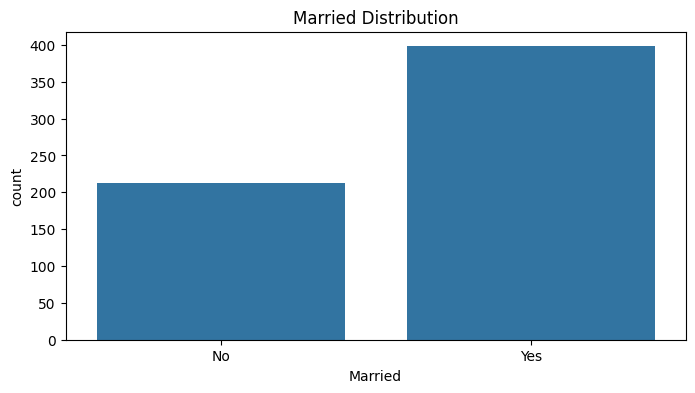

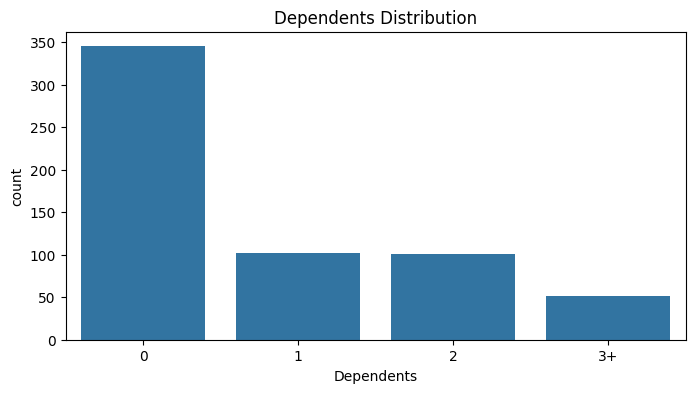

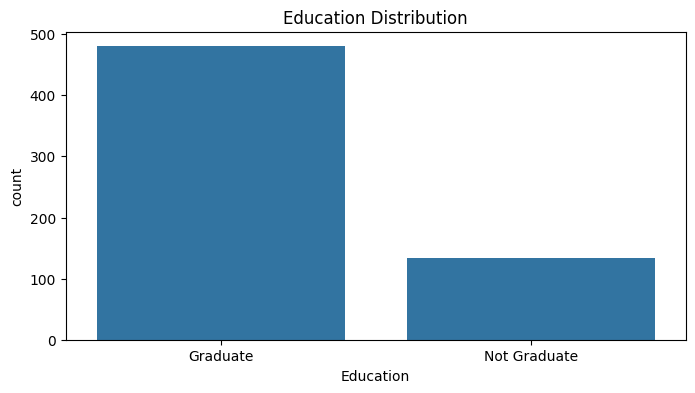

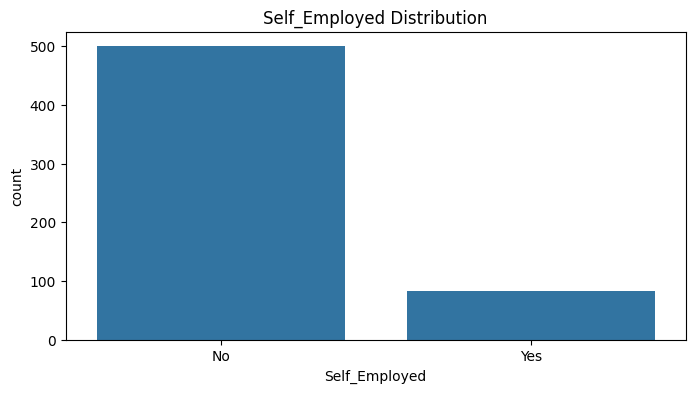

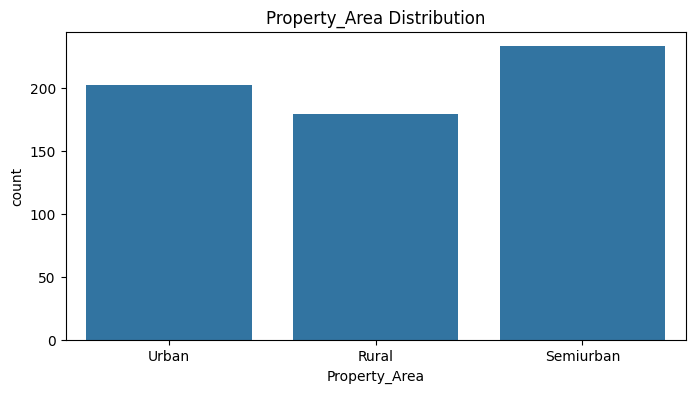

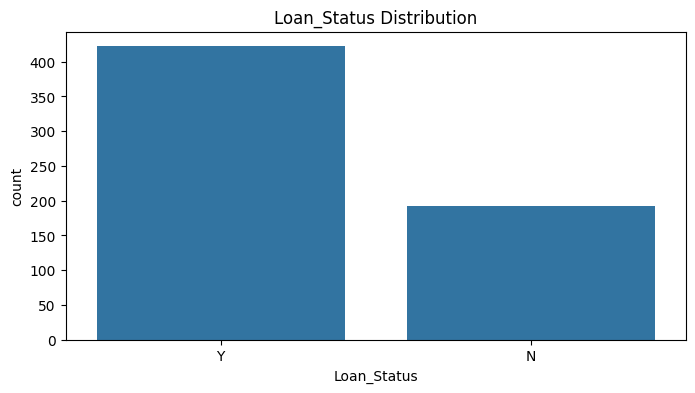

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=loan_data, x=feature)
    plt.title(f'{feature} Distribution')
    plt.show()

9. Sayısal Değişkenlerin Dağılımı

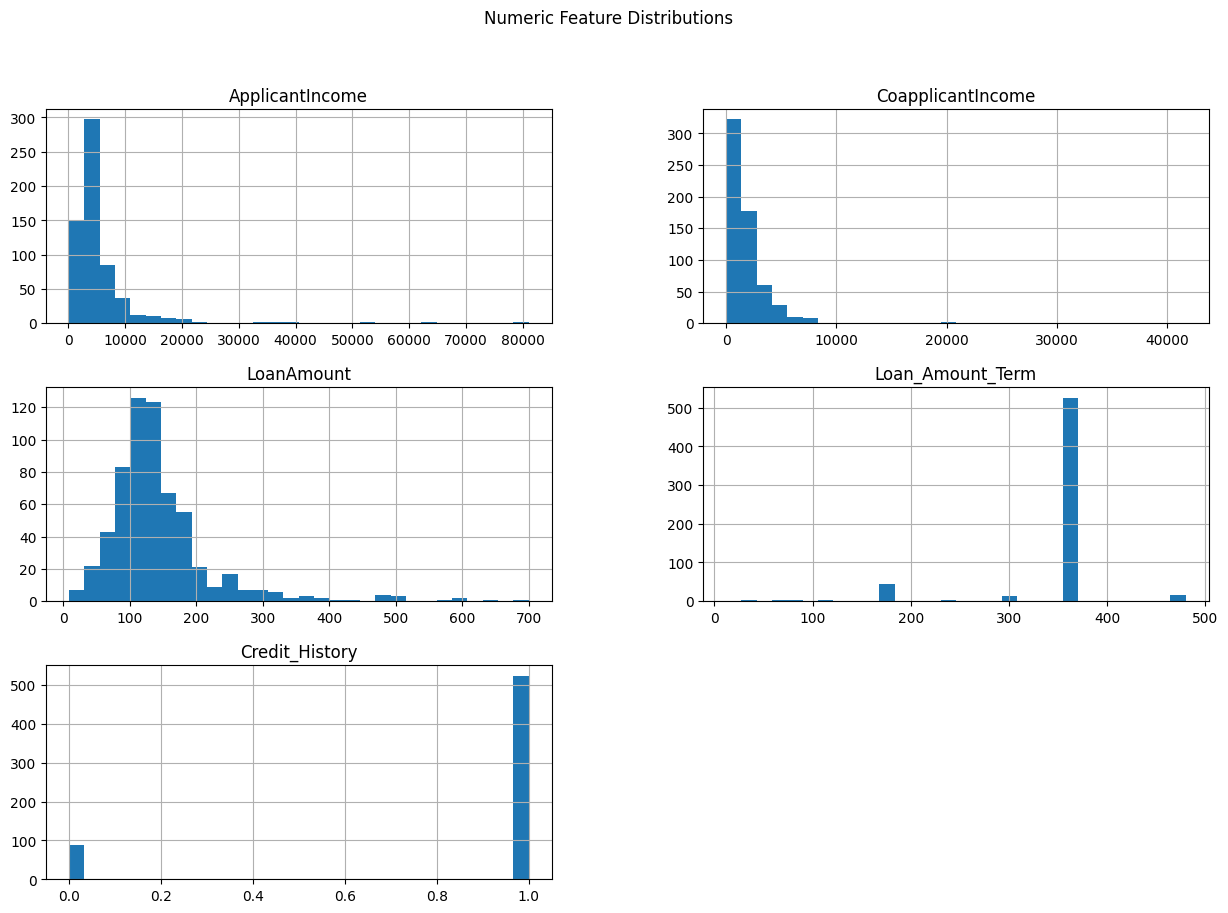

In [9]:
numeric_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

loan_data[numeric_features].hist(bins=30, figsize=(15, 10))
plt.suptitle('Numeric Feature Distributions')
plt.show()

10. Korelasyon Analizi

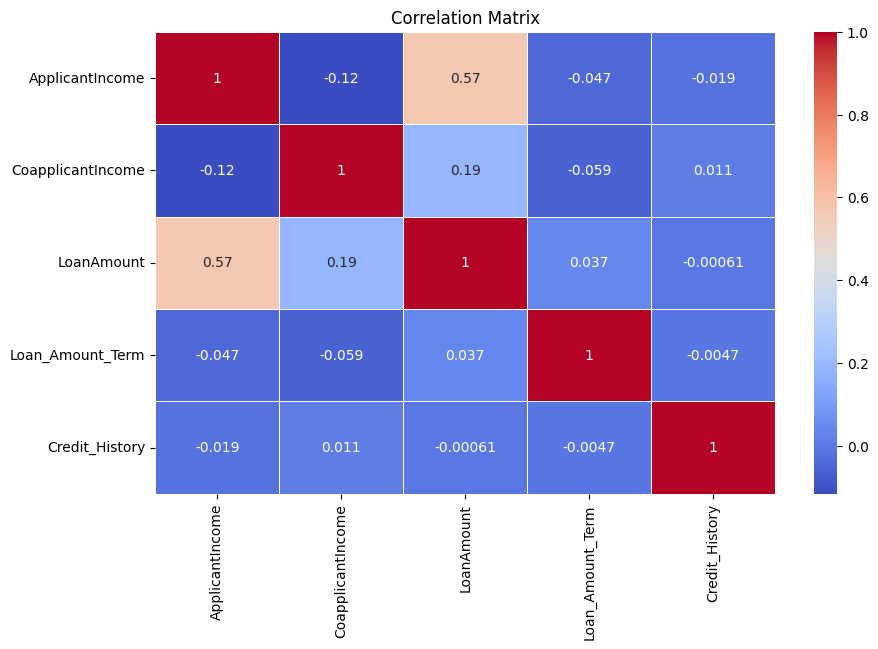

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(loan_data[numeric_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

11. Hedef Değişken ile İlişkiler (Hedef değişken olan Loan_Status ile diğer değişkenler arasındaki ilişki incelenmiştir.)

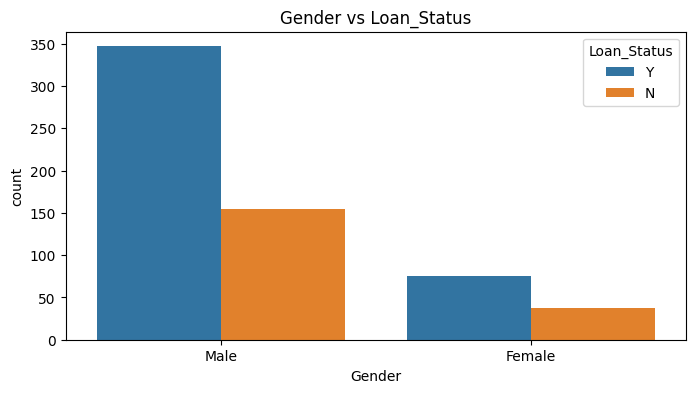

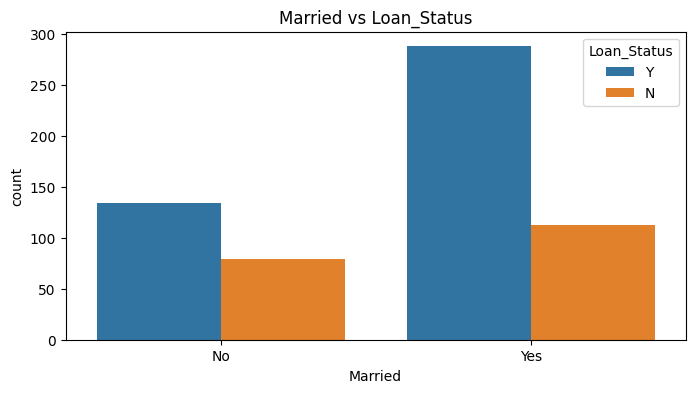

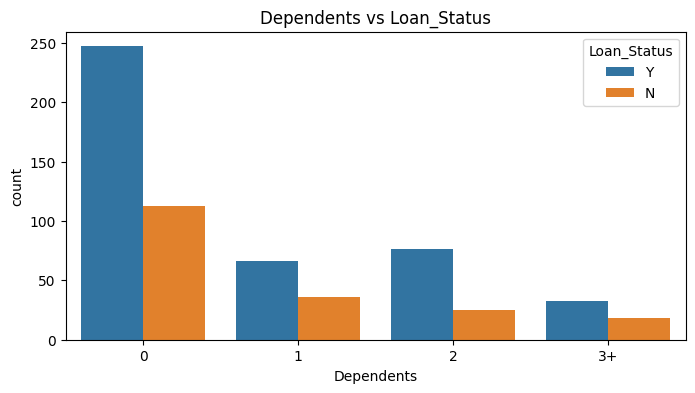

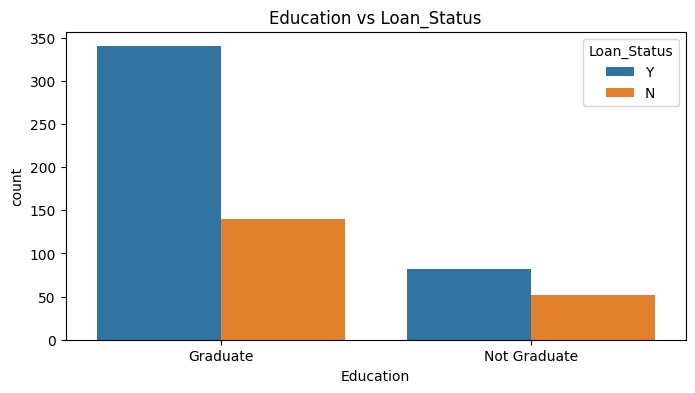

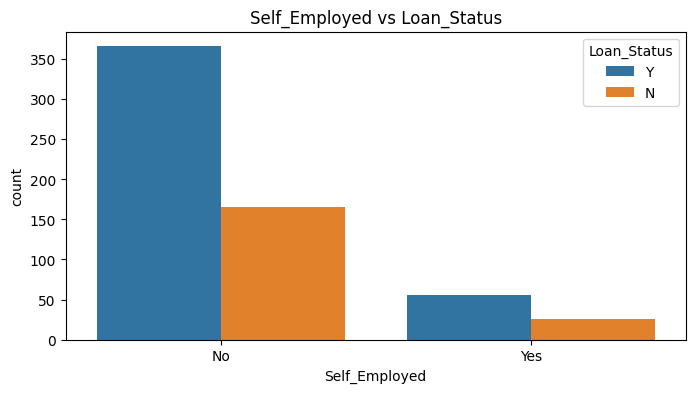

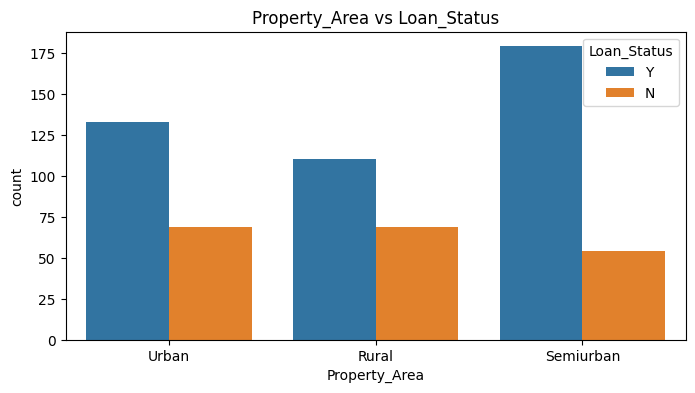

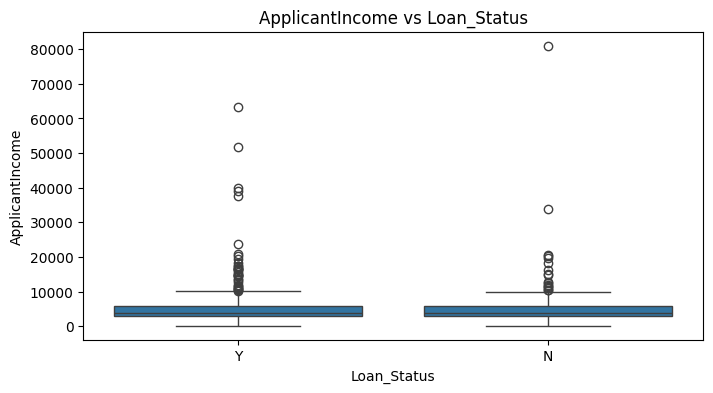

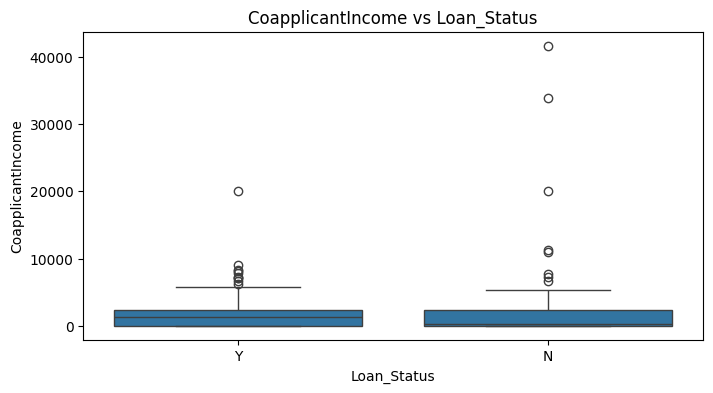

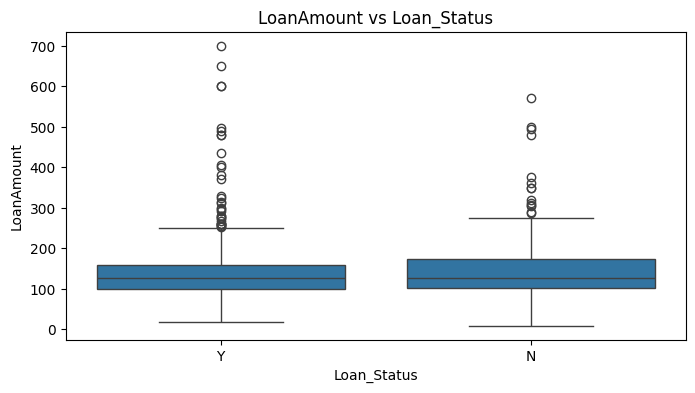

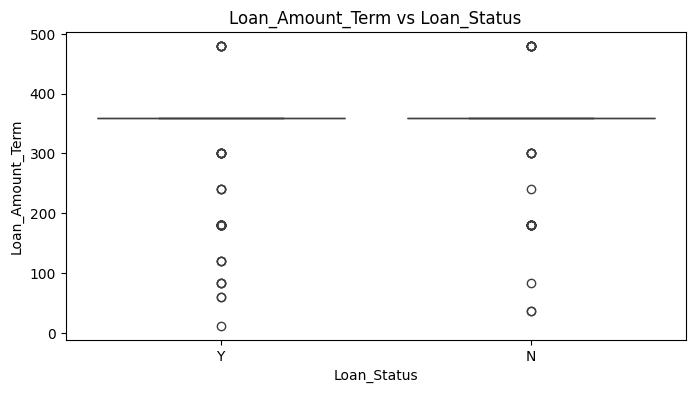

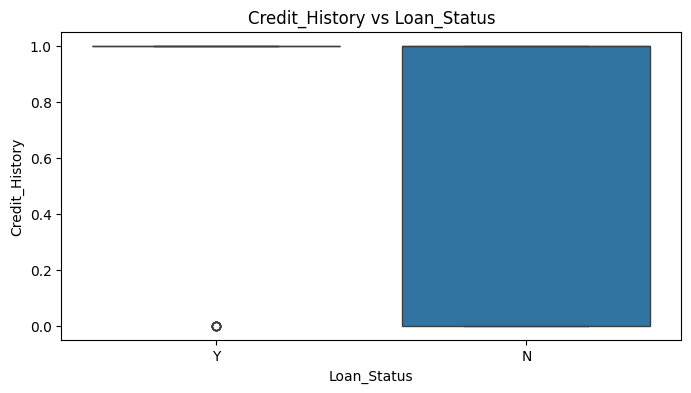

In [10]:
for feature in categorical_features[:-1]:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=loan_data, x=feature, hue='Loan_Status')
    plt.title(f'{feature} vs Loan_Status')
    plt.show()

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=loan_data, x='Loan_Status', y=feature)
    plt.title(f'{feature} vs Loan_Status')
    plt.show()